In [4]:
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend, THStack
import copy
import math
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()

In [5]:
def getRangeY(hist):
    global y_upper
    max_entry = hist.GetMaximum()
    if max_entry > y_upper:
        y_upper = max_entry * 1.1
def setHistOpt(hist, lcolor, lstyle):
    hist.SetLineWidth(2)
    hist.SetLineColor(lcolor)
    hist.SetLineStyle(lstyle)
def plot(h_plot, canvas, leg, xtitle, dopt, hlabel):
    global y_upper
    h_plot.Draw(dopt)
    h_plot.GetXaxis().SetTitle(xtitle)
    h_plot.GetXaxis().SetTitleOffset(1.2)
    h_plot.GetYaxis().SetTitle("Events")
    h_plot.SetMinimum(0.1)
    h_plot.SetMaximum(y_upper)
    leg.AddEntry(h_plot,hlabel)

In [9]:
hist_dic = {}
file_list = []
var2plot = ["dijet_eta", "dR_jj", "dEta_jj", "dPhi_jj", "dR_j0j2", "dEta_j0j2", "dPhi_j0j2", "dR_j1j2", "dEta_j1j2", "dPhi_j1j2", "jet_eta_0", 
 "jet_ptoverm_0", "jet_eta_1", "jet_ptoverm_1", "jet_eta_2", "jet_ptoverm_2", "dR_jj_j", "dEta_jj_j", "dPhi_jj_j", "jet_ptoverM_0", 
 "jet_ptoverM_1", "jet_ptoverM_2", "dijet_ptoverM","m_jj","M_jjj"]
for var in var2plot:
    hist_dic[var] = THStack(var,var)
sample_list = ["QCD_Pt_300to470", "QCD_Pt_470to600","QCD_Pt_600to800","QCD_Pt_800to1000","QCD_Pt_1000to1400","QCD_Pt_1400to1800", "QCD_Pt_1800to2400",
               "QCD_Pt_2400to3200","QCD_Pt_3200toInf"]
# sample_list = ["QCD_Pt_3200toInf"]
sample_list.reverse()
for i, sample in enumerate(sample_list):
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/ML_study_v2/histograms/{sample}_histos.root")
    file_list.append(file)
    for var in var2plot:
        hist = file.Get(f"{sample}_{var}")
        setHistOpt(hist, i+1, 1)
        hist_dic[var].Add(hist)

dijet_eta
dR_jj
dEta_jj
dPhi_jj
dR_j0j2
dEta_j0j2
dPhi_j0j2
dR_j1j2
dEta_j1j2
dPhi_j1j2
jet_eta_0
jet_ptoverm_0
jet_eta_1
jet_ptoverm_1
jet_eta_2
jet_ptoverm_2
dR_jj_j
dEta_jj_j
dPhi_jj_j
jet_ptoverM_0
jet_ptoverM_1
jet_ptoverM_2
dijet_ptoverM
m_jj
M_jjj


Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijet_eta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dEta_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dPhi_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_j0j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dEta_j0j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dPhi_j0j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_j1j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dEta_j1j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dPhi_j1j2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_eta_0
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_ptoverm_0
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_eta_1
Warning

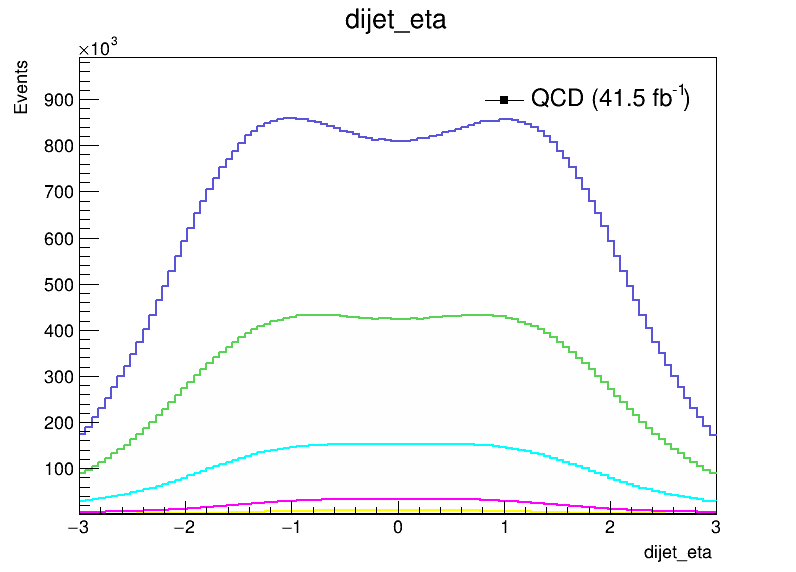

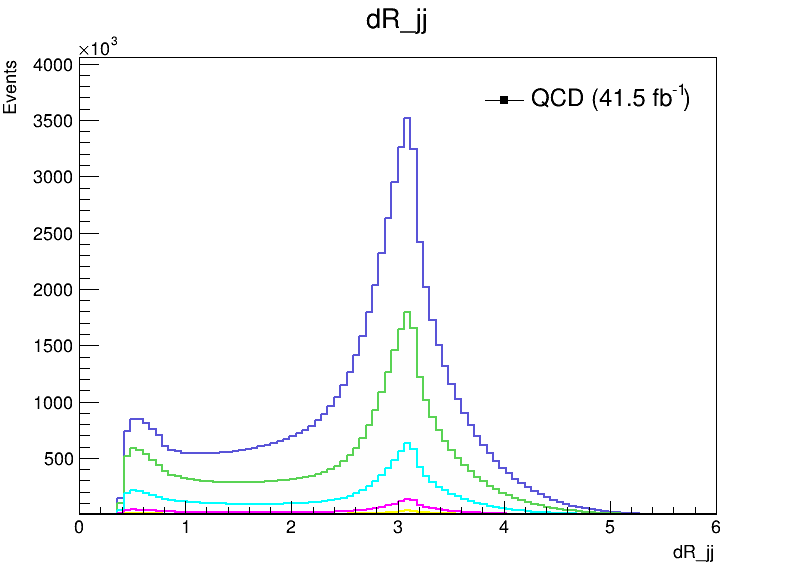

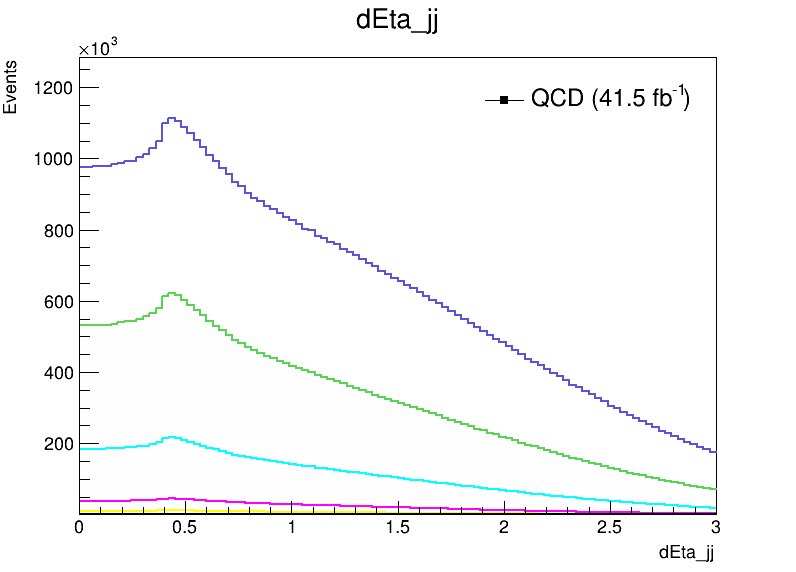

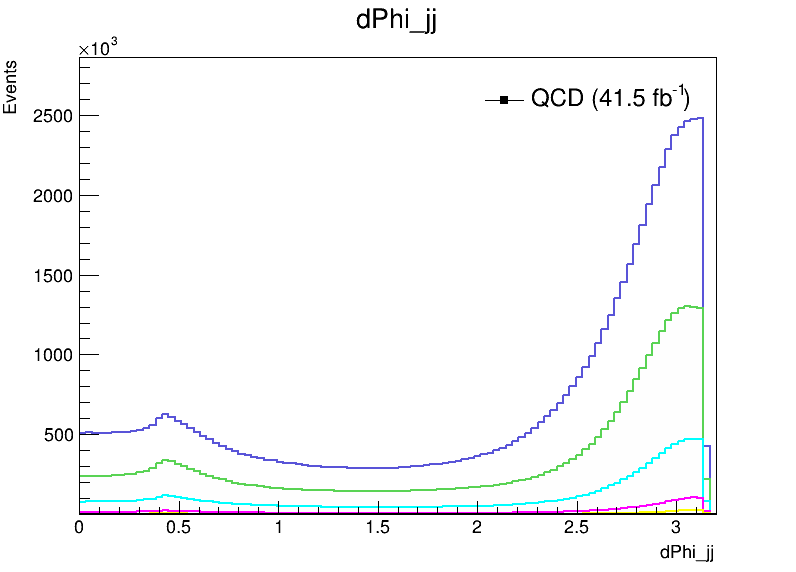

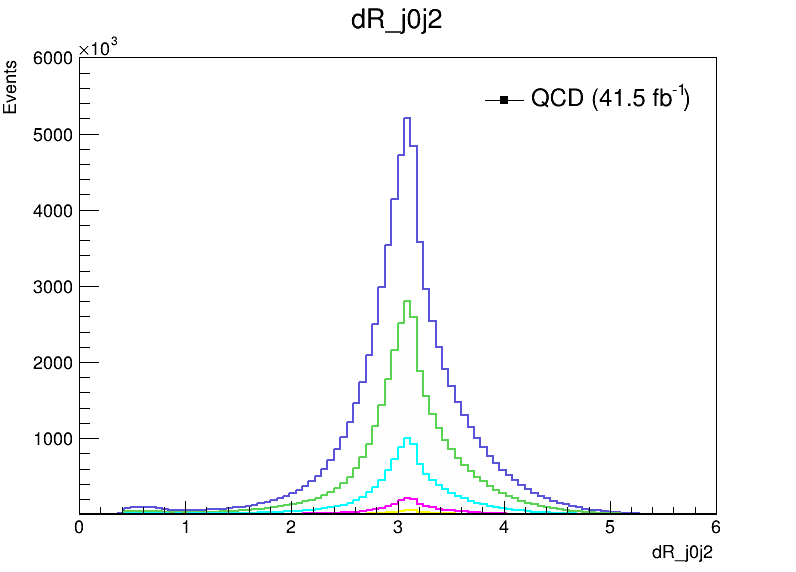

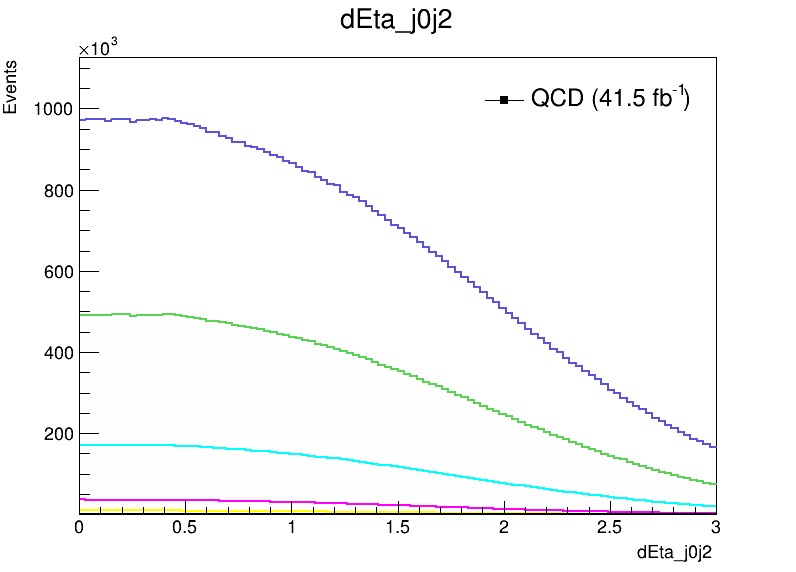

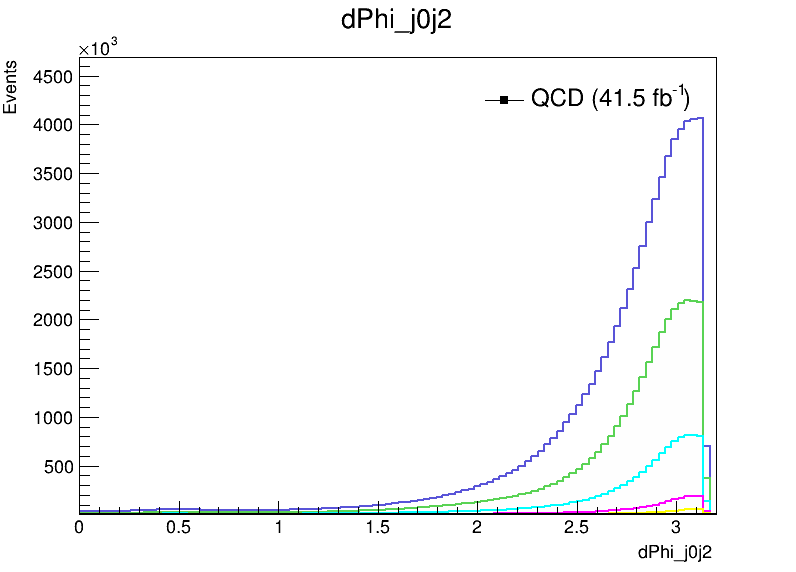

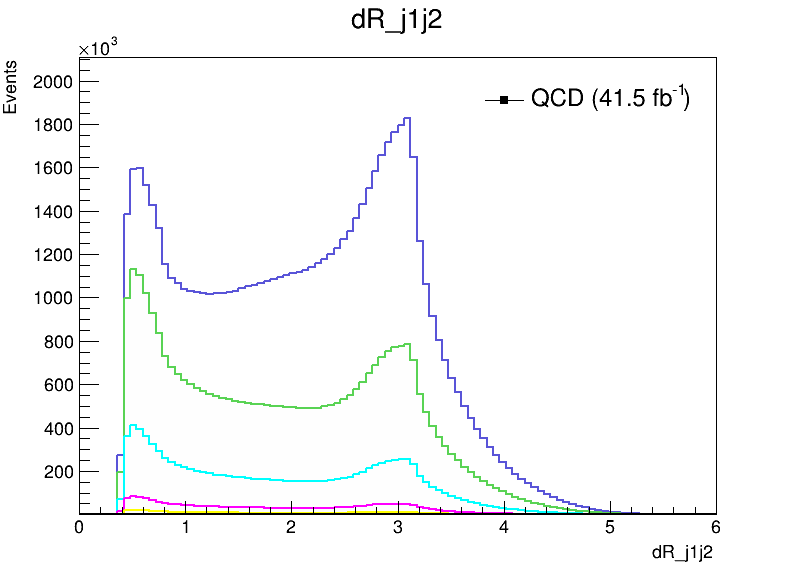

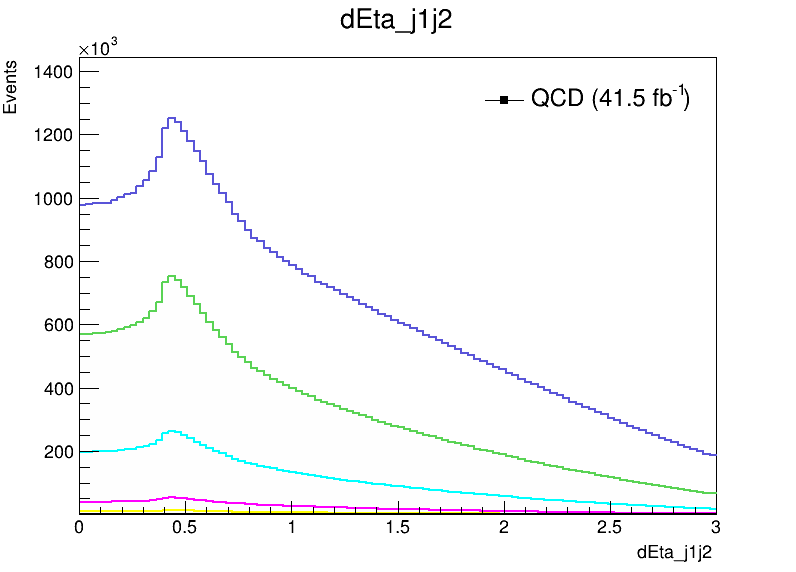

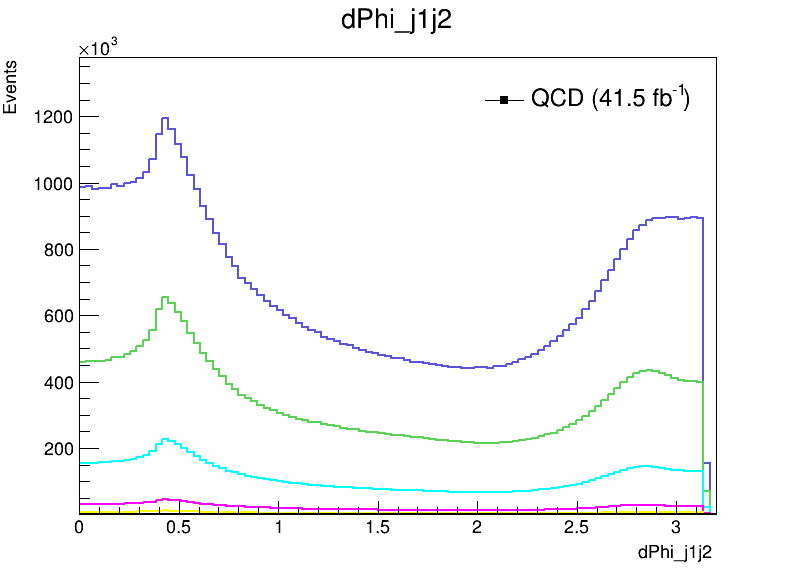

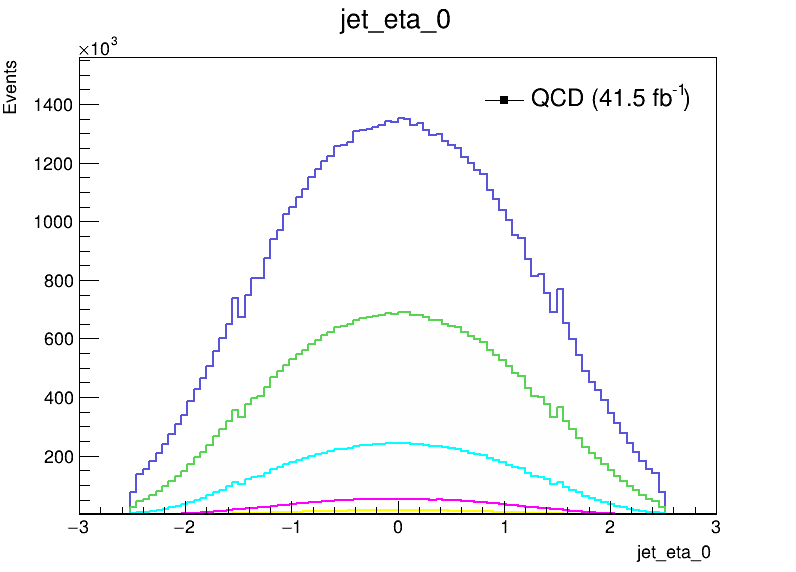

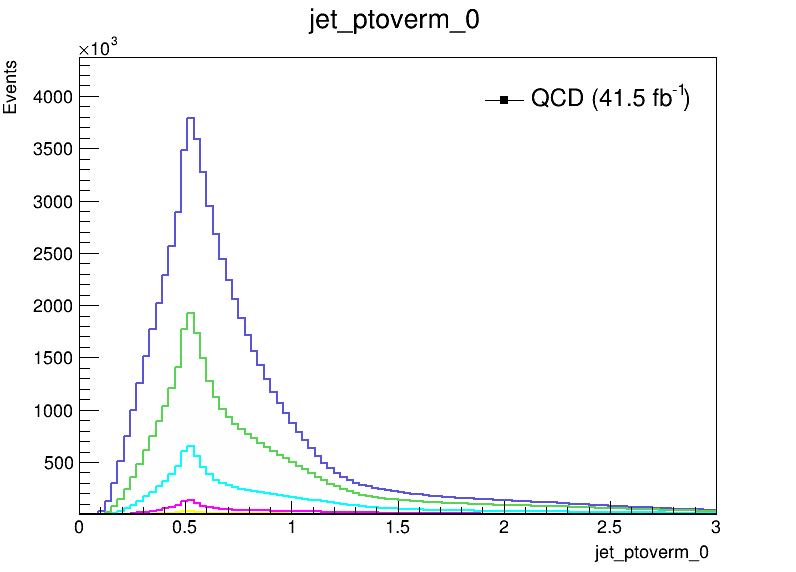

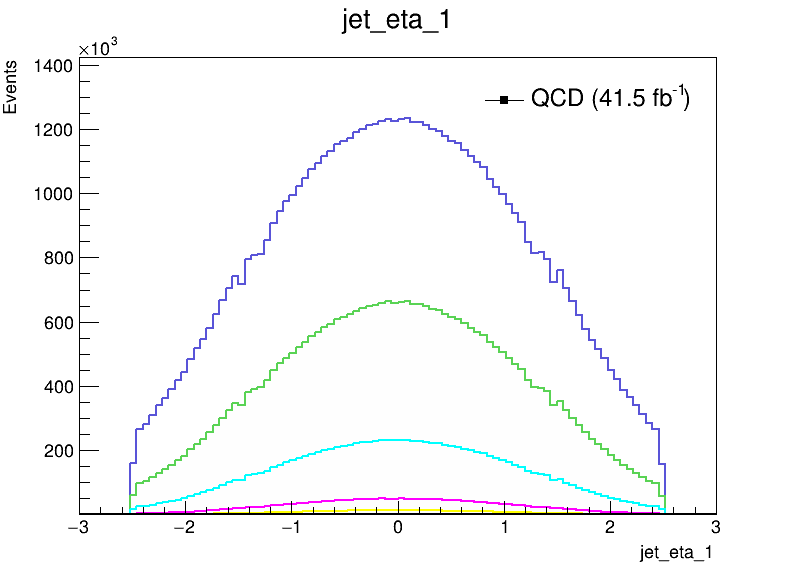

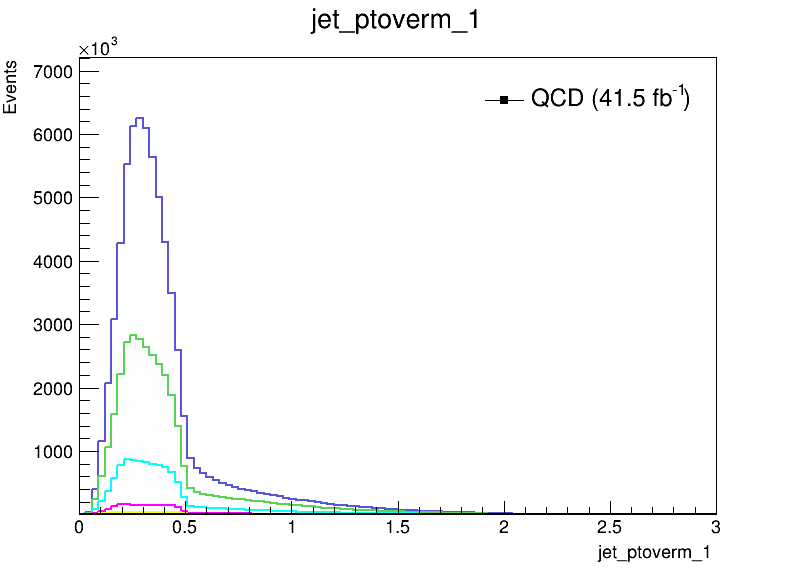

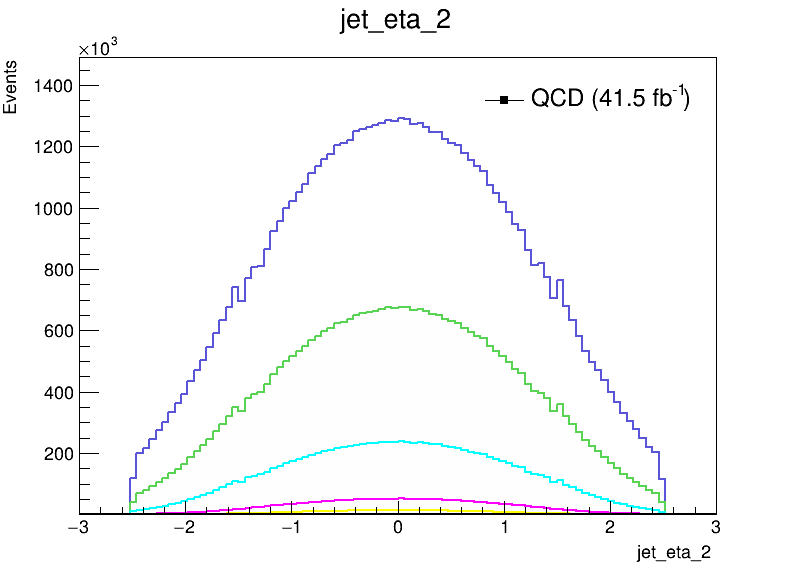

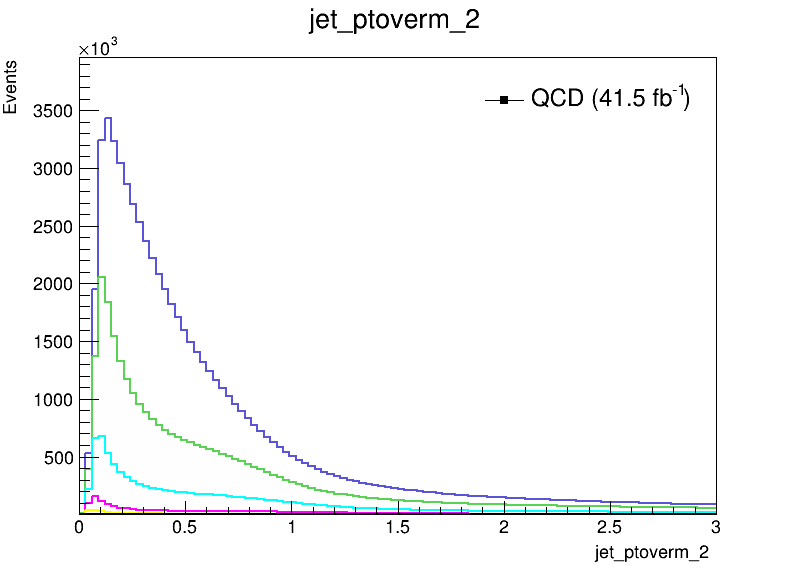

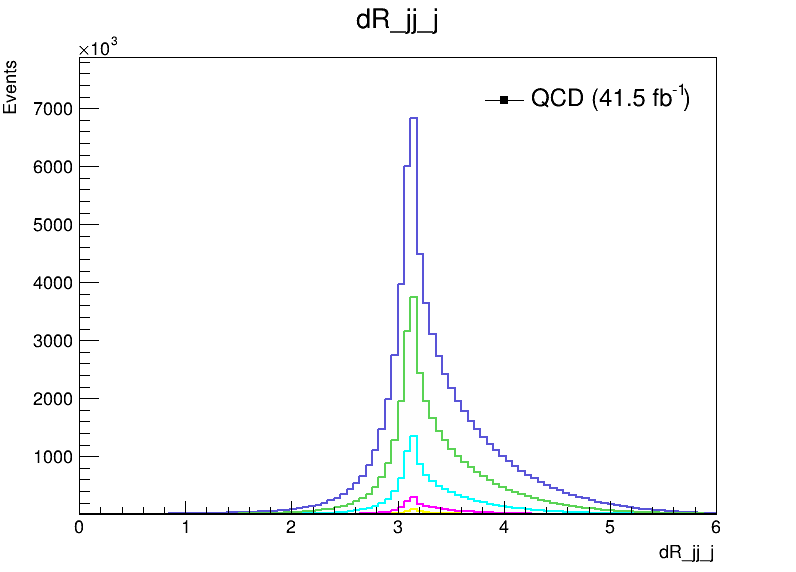

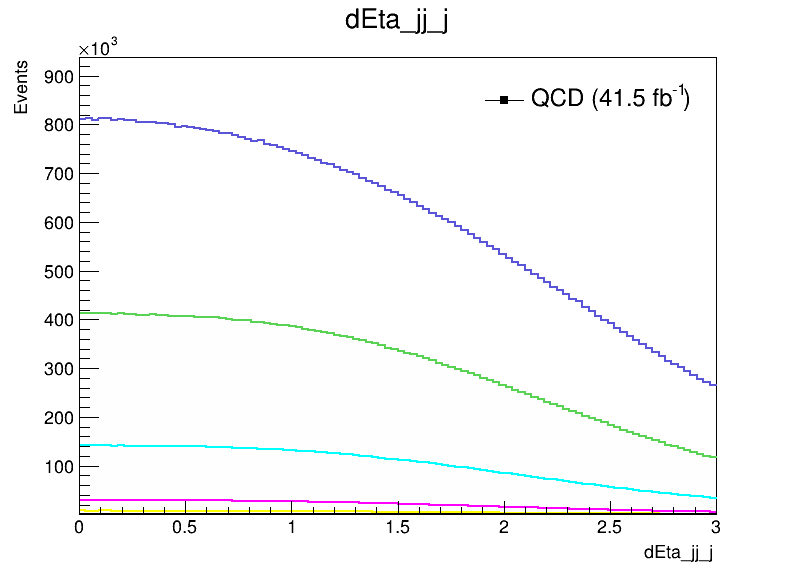

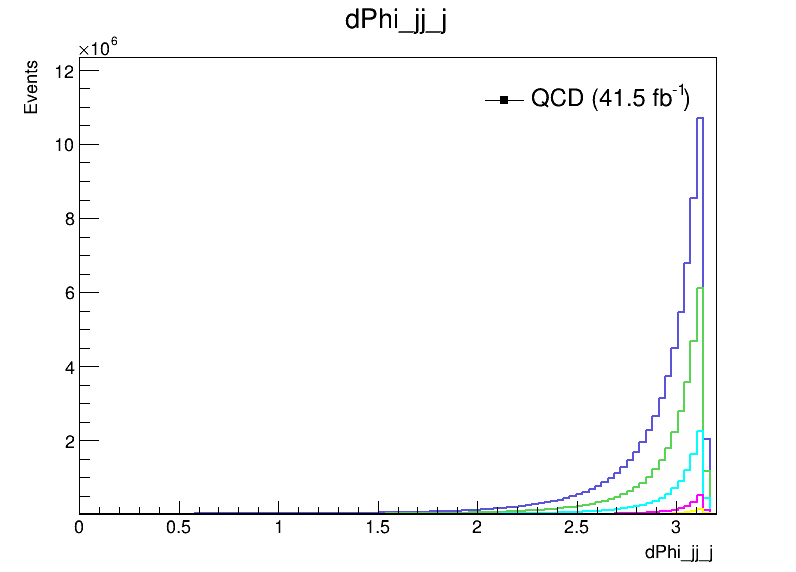

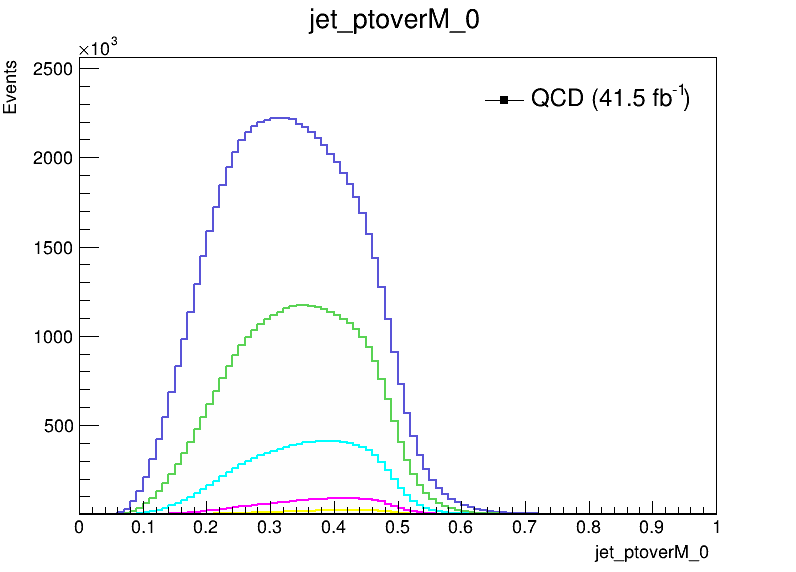

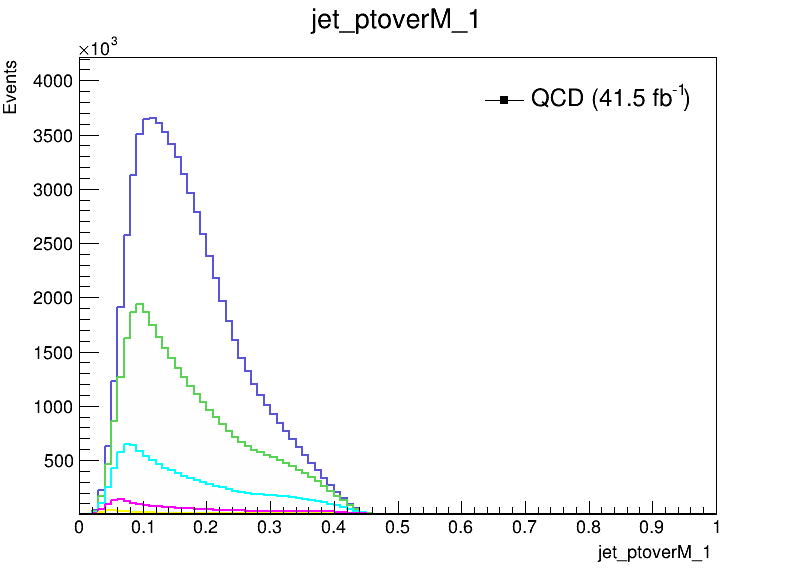

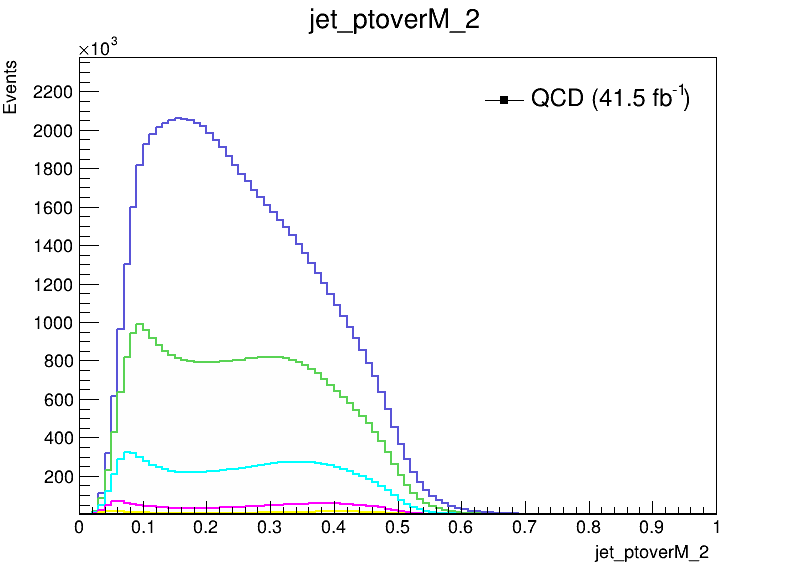

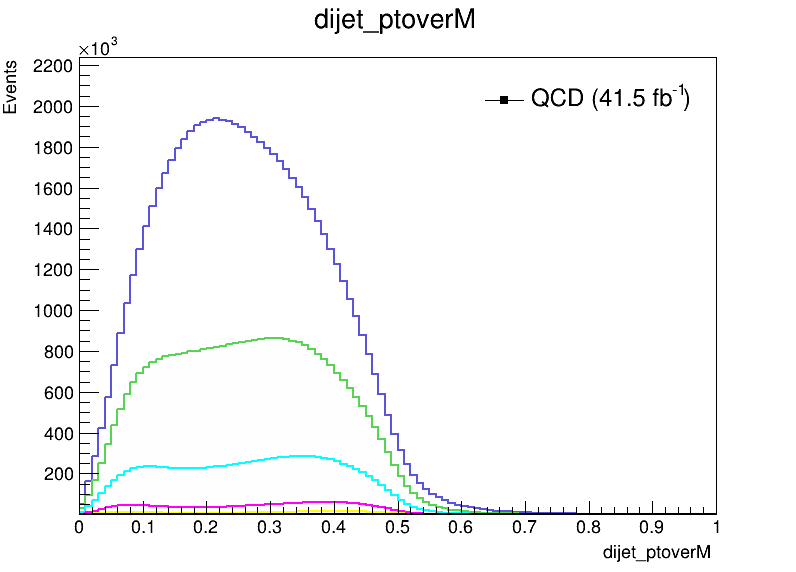

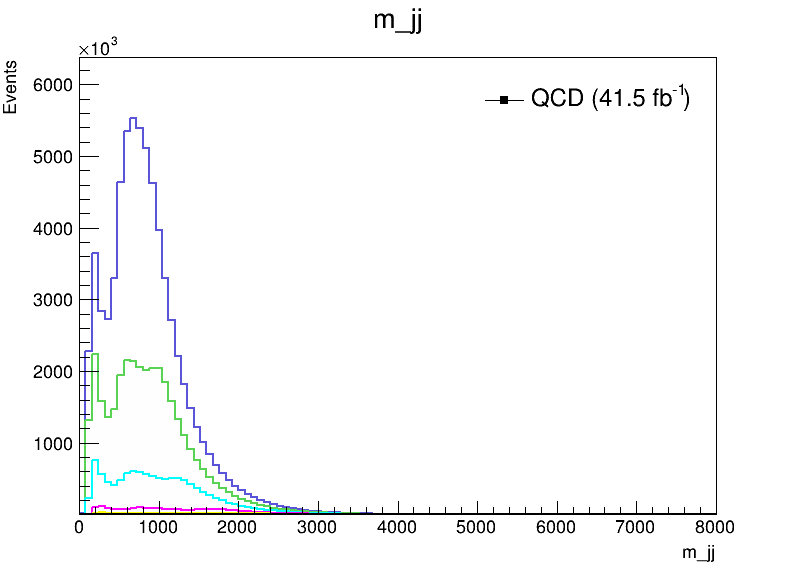

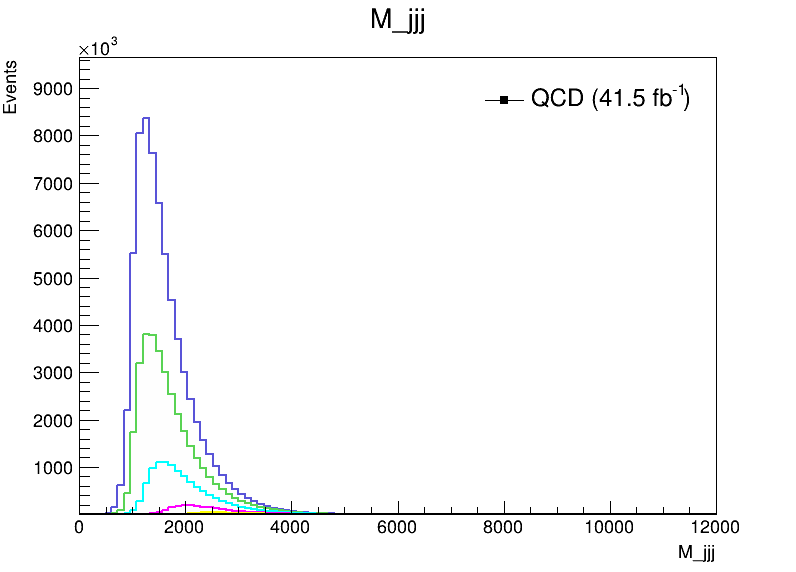

In [11]:
nvar = len(hist_dic.keys())
nrow = math.ceil(nvar/3)
plot_list = []
leg_list = []
plot_name_list = []
for variable, hist in hist_dic.items():
    y_upper = 0
    getRangeY(hist)
    c = TCanvas(variable,"",800,600)
    leg = TLegend(0.6,0.8,0.87,0.85)
    leg.SetBorderSize(0)
    title = hist.GetTitle()
    print(title)
    plot(h_plot=hist, canvas=c, leg=leg, xtitle=title, dopt="HIST", hlabel="QCD (41.5 fb^{-1})")
    plot_list.append(c)
    leg_list.append(leg)
    plot_name_list.append(hist.GetName())
for i in range(0,len(plot_list)):
    plot_list[i].cd()
#     plot_list[i].SetLogy()
    leg_list[i].Draw()
    plot_list[i].Draw()
    plot_list[i].Print(f"{plot_name_list[i]}.png")